In [1]:
from footium_api import GqlConnection, CachedGqlConnection
from footium_api.queries import get_players
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

gql_uncached = GqlConnection()
gql = CachedGqlConnection(gql_uncached, ttl=60*60*24)
plt.rcParams['figure.dpi'] = 254

In [2]:
owners = [
    1164,
    65,
    72,
    1079,
    1405,
    1413,
    1414,
    1415,
    1416,
    1417,
]
filter = {
    "ownerId": {"in": owners},
}

clubIds = [
    78,
    102,
    1077,
    2897,
    1315,
    2715,
    3012,
    1450,
    462,
    2774,
    1511,
    676,
    1314,
    706,
    728,
    1901,
    894,
    604,
    2180,
    1198,
    85,
    2815,
    2388,
    2228,
    521,
    577,
    1291,
    523,
    1508,
    503,
    1278,
    1302,
    1834,
    2805,
    2839,
    498,
    1033,
    1332,
    1811,
    1831,
    2551,
    2659,
    2896,
    2661,
    2320,
    2915,
    2991,
    2453,
    2879,
]
filter = {
    "clubId": {"in": clubIds},
}


players = get_players(gql, filter)

In [3]:
print(len(players))
players.head()


2185


,fullName,creationRating,potential,rarity,clubId,ownerId,originClubId,generationId,isAcademy,isReserve,...,LWB,RWB,CM,LM,RM,DM,AM,LW,RW,CF
id,,,,,,,,,,,,,,,,,,,,,
0-102-0,Felice Ferrara,42,22,Bronze,1314,1413,102,0,False,False,...,34.54000,33.15840,24.090,33.97900,32.61984,17.292,31.196,42.97700,41.25792,25.762
0-102-1,Walter Steiner,42,22,Bronze,462,1413,102,1,False,False,...,42.80100,41.51697,29.744,37.51000,36.38470,30.250,31.702,41.27200,40.03384,27.049
0-102-10,Pablo Pereira,47,19,Bronze,102,1164,102,10,False,False,...,36.99289,38.13700,47.762,40.69538,41.95400,46.794,47.003,37.63309,38.79700,44.275
0-102-11,Slobodan Knežević,46,20,Bronze,102,1164,102,11,False,False,...,28.32984,28.90800,33.242,24.93414,25.44300,42.493,25.113,18.44458,18.82100,32.681
0-102-12,Mariano Cardozo,47,17,Bronze,102,1164,102,12,False,False,...,37.28098,38.43400,40.150,41.49563,42.77900,31.713,47.982,42.56263,43.87900,37.851


In [4]:
# players.columns.values
outfield_positions = ["CF", "LW", "RW", "AM", "LM", "CM", "RM", "DM", "LWB", "RWB", "LB", "CB", "RB"]
all_positions = outfield_positions + ["GK"]
print(len(players))
players['topRating'] = players[all_positions].max(axis=1)
players['topPosition'] = players[all_positions].idxmax(axis=1)
academy_players = players[players['isAcademy'] == True]
reserve_players = players[players['isReserve'] == True]
players = players[players['isAcademy'] == False]
players = players[players['isReserve'] == False]
print(len(players), len(academy_players), len(reserve_players))



2185
1109 243 833


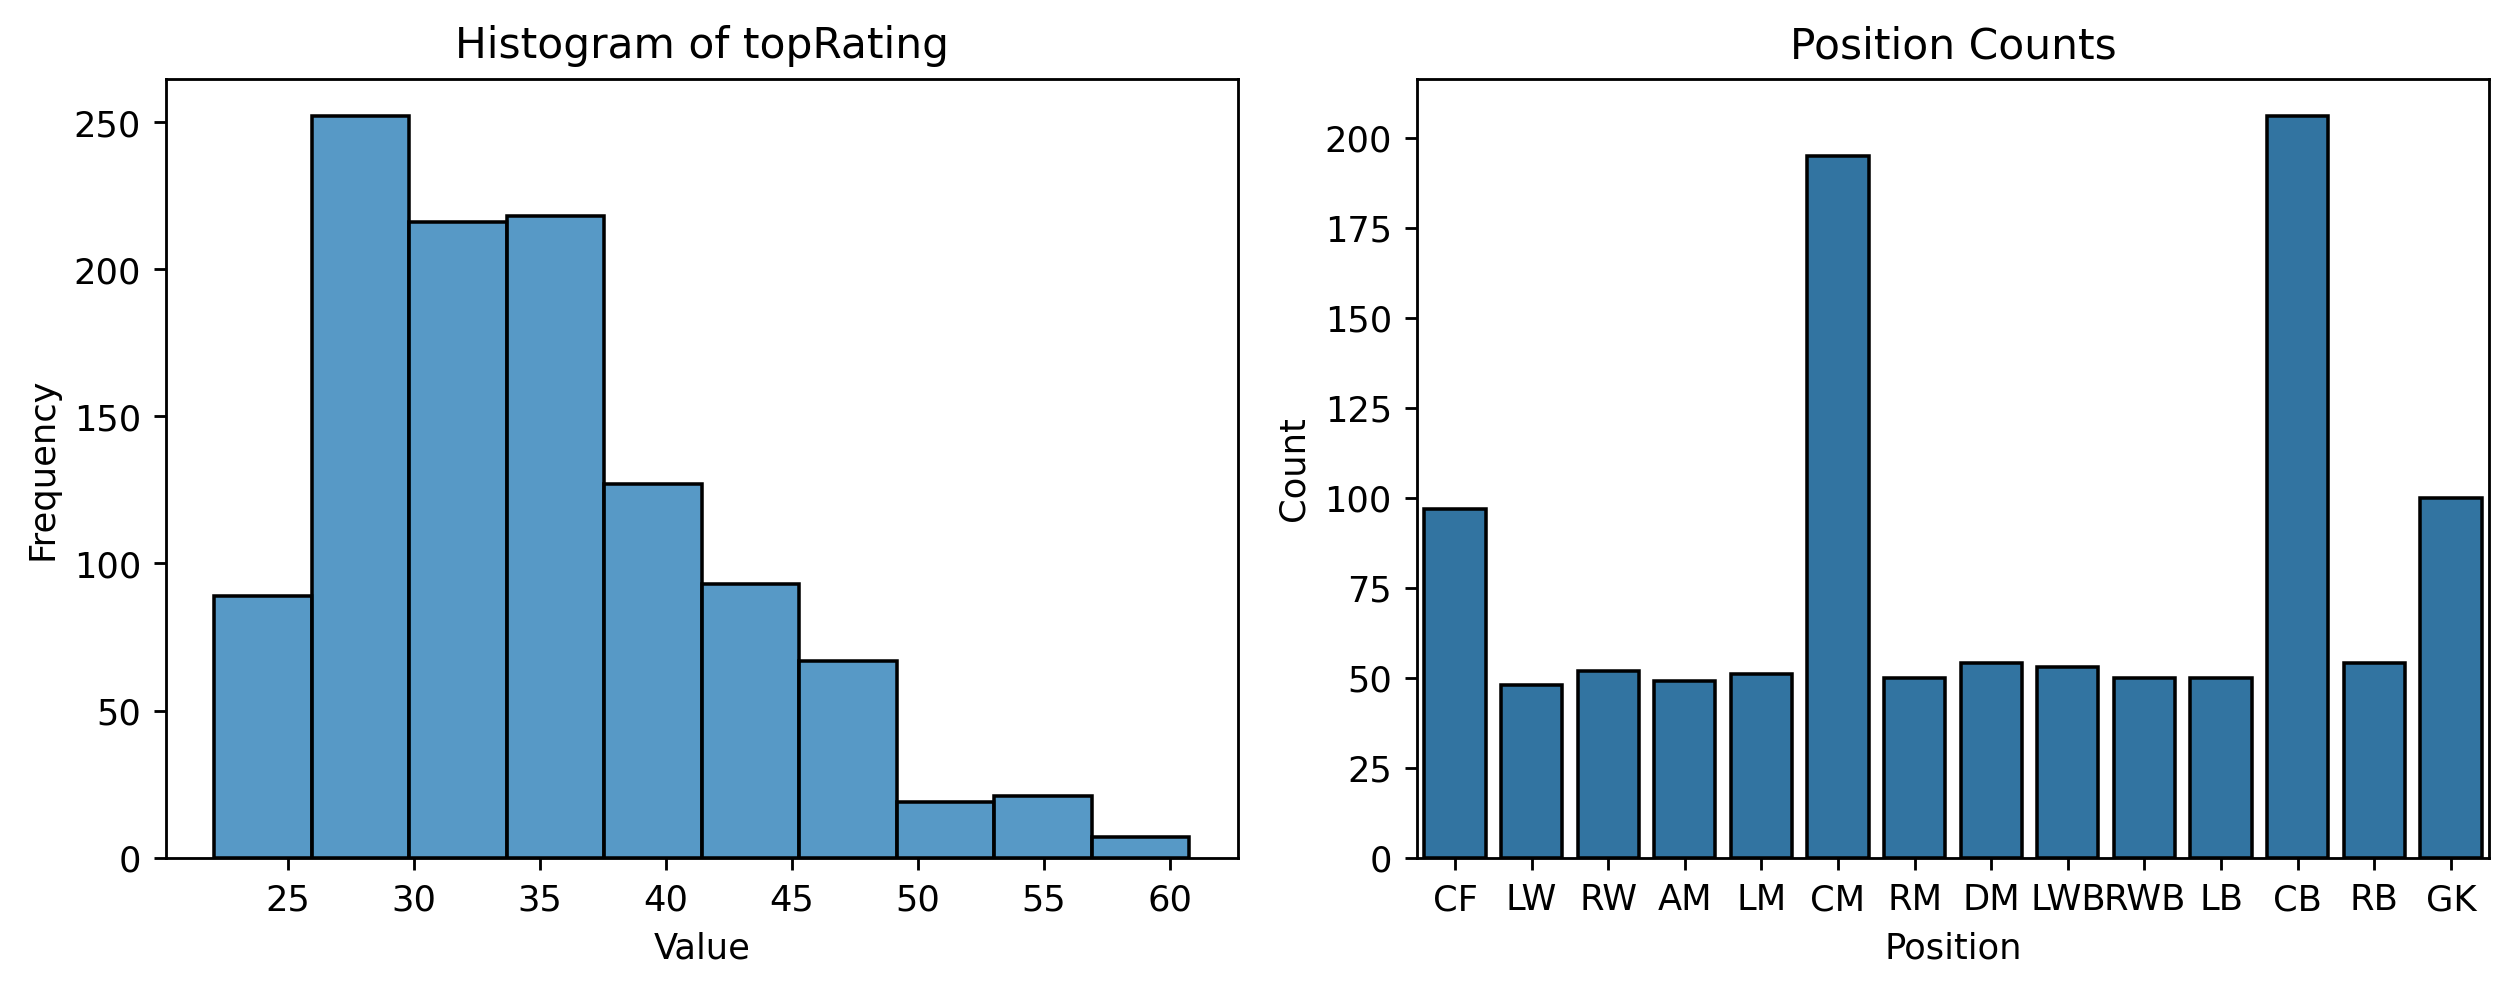

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Histogram of topRating
sns.histplot(players['topRating'], bins=10, kde=False, edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram of topRating')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot 2: Position Counts
position_counts = {position: (players['topPosition'] == position).sum() for position in all_positions}
position_counts_series = pd.Series(position_counts)
sns.barplot(x=position_counts_series.index, y=position_counts_series.values, edgecolor='black', ax=axs[1])
axs[1].set_title('Position Counts')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Count')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

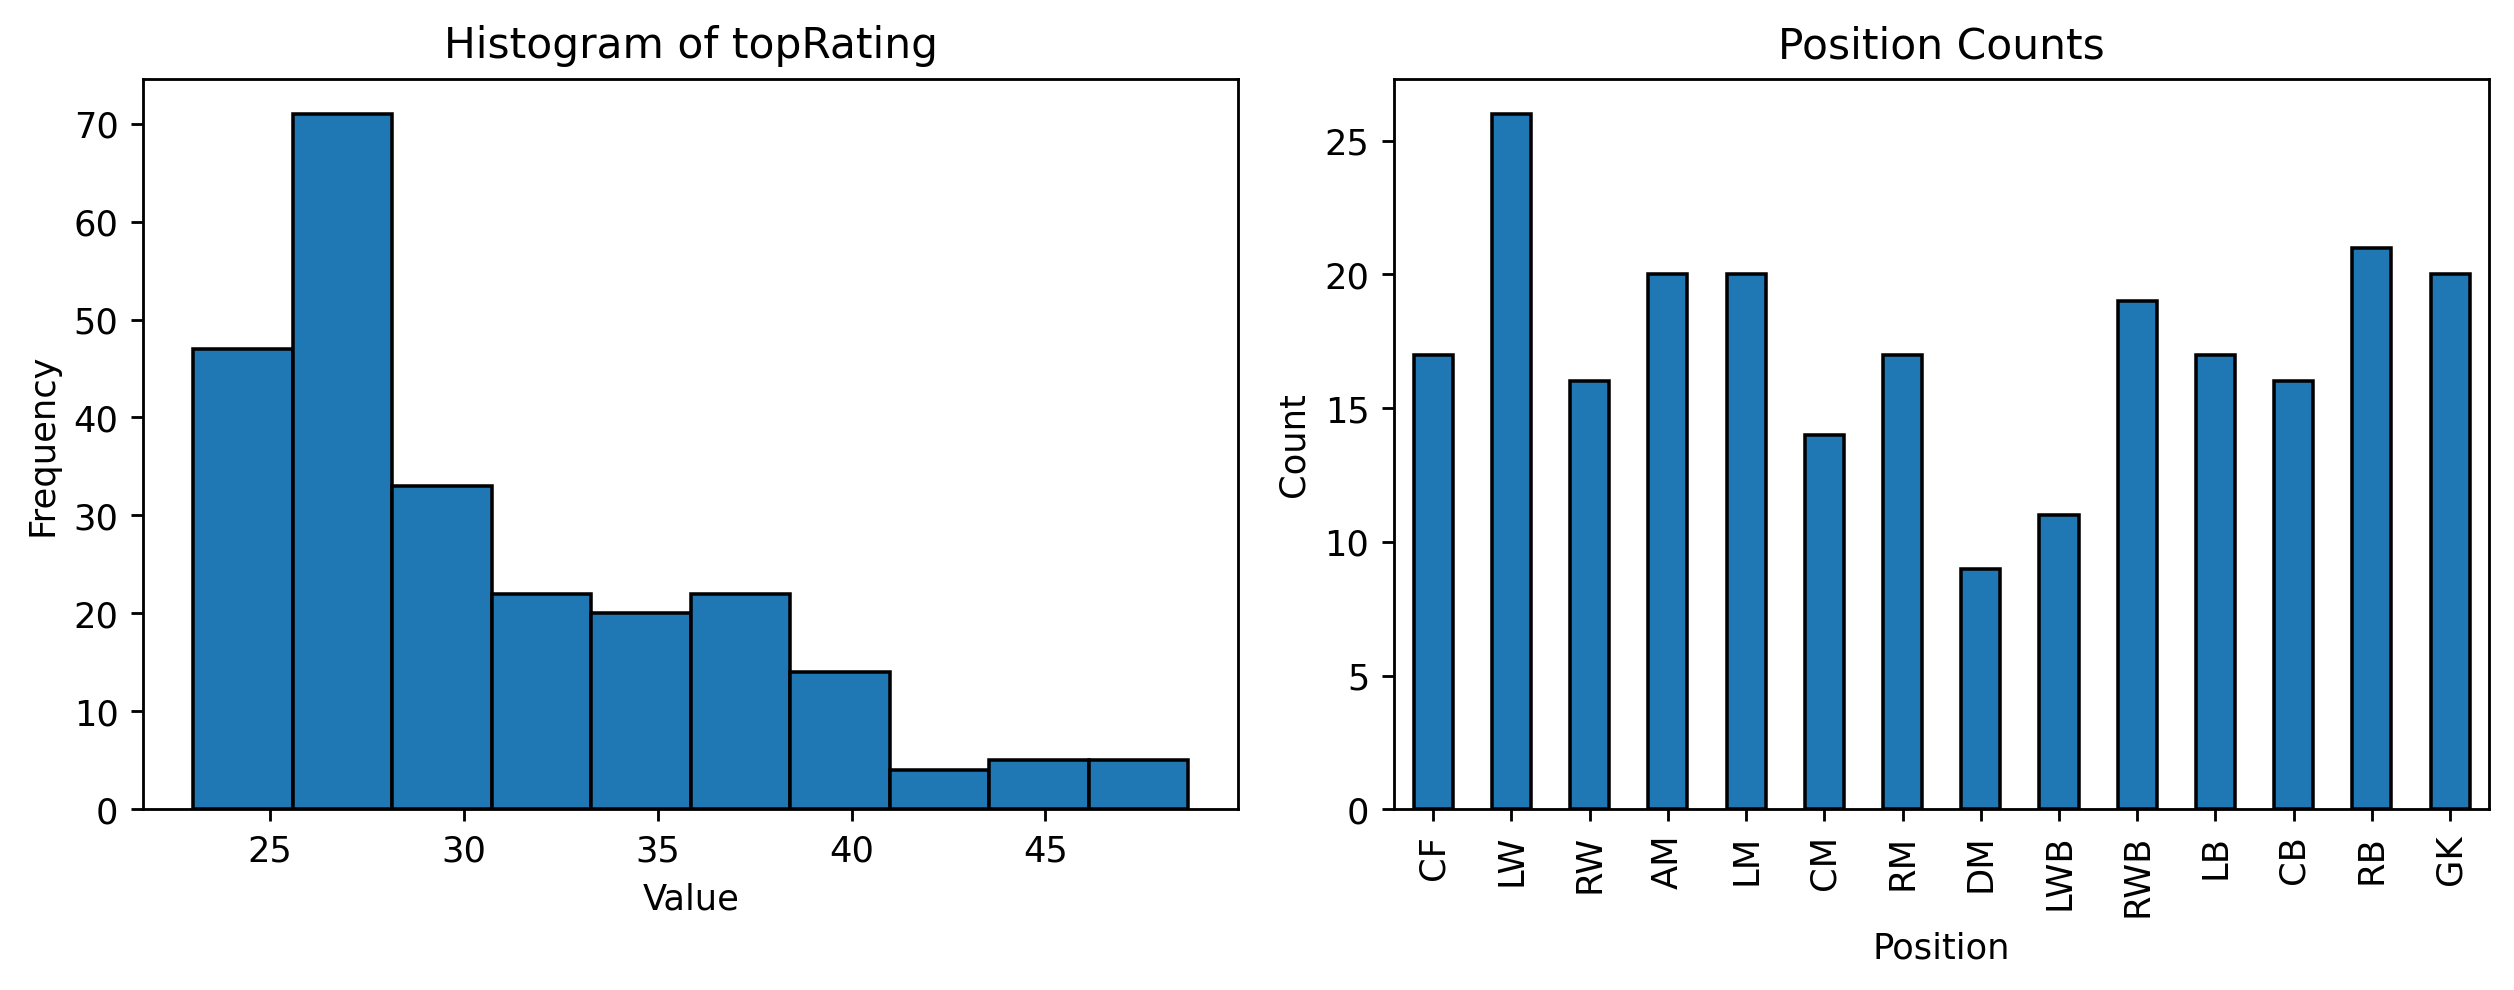

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1
axs[0].hist(academy_players['topRating'], bins=10, edgecolor='black')
axs[0].set_title('Histogram of topRating')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot 2
position_counts = {position: (academy_players['topPosition'] == position).sum() for position in all_positions}
position_counts_series = pd.Series(position_counts)
position_counts_series.plot.bar(edgecolor='black', ax=axs[1])
axs[1].set_title('Position Counts')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Count')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

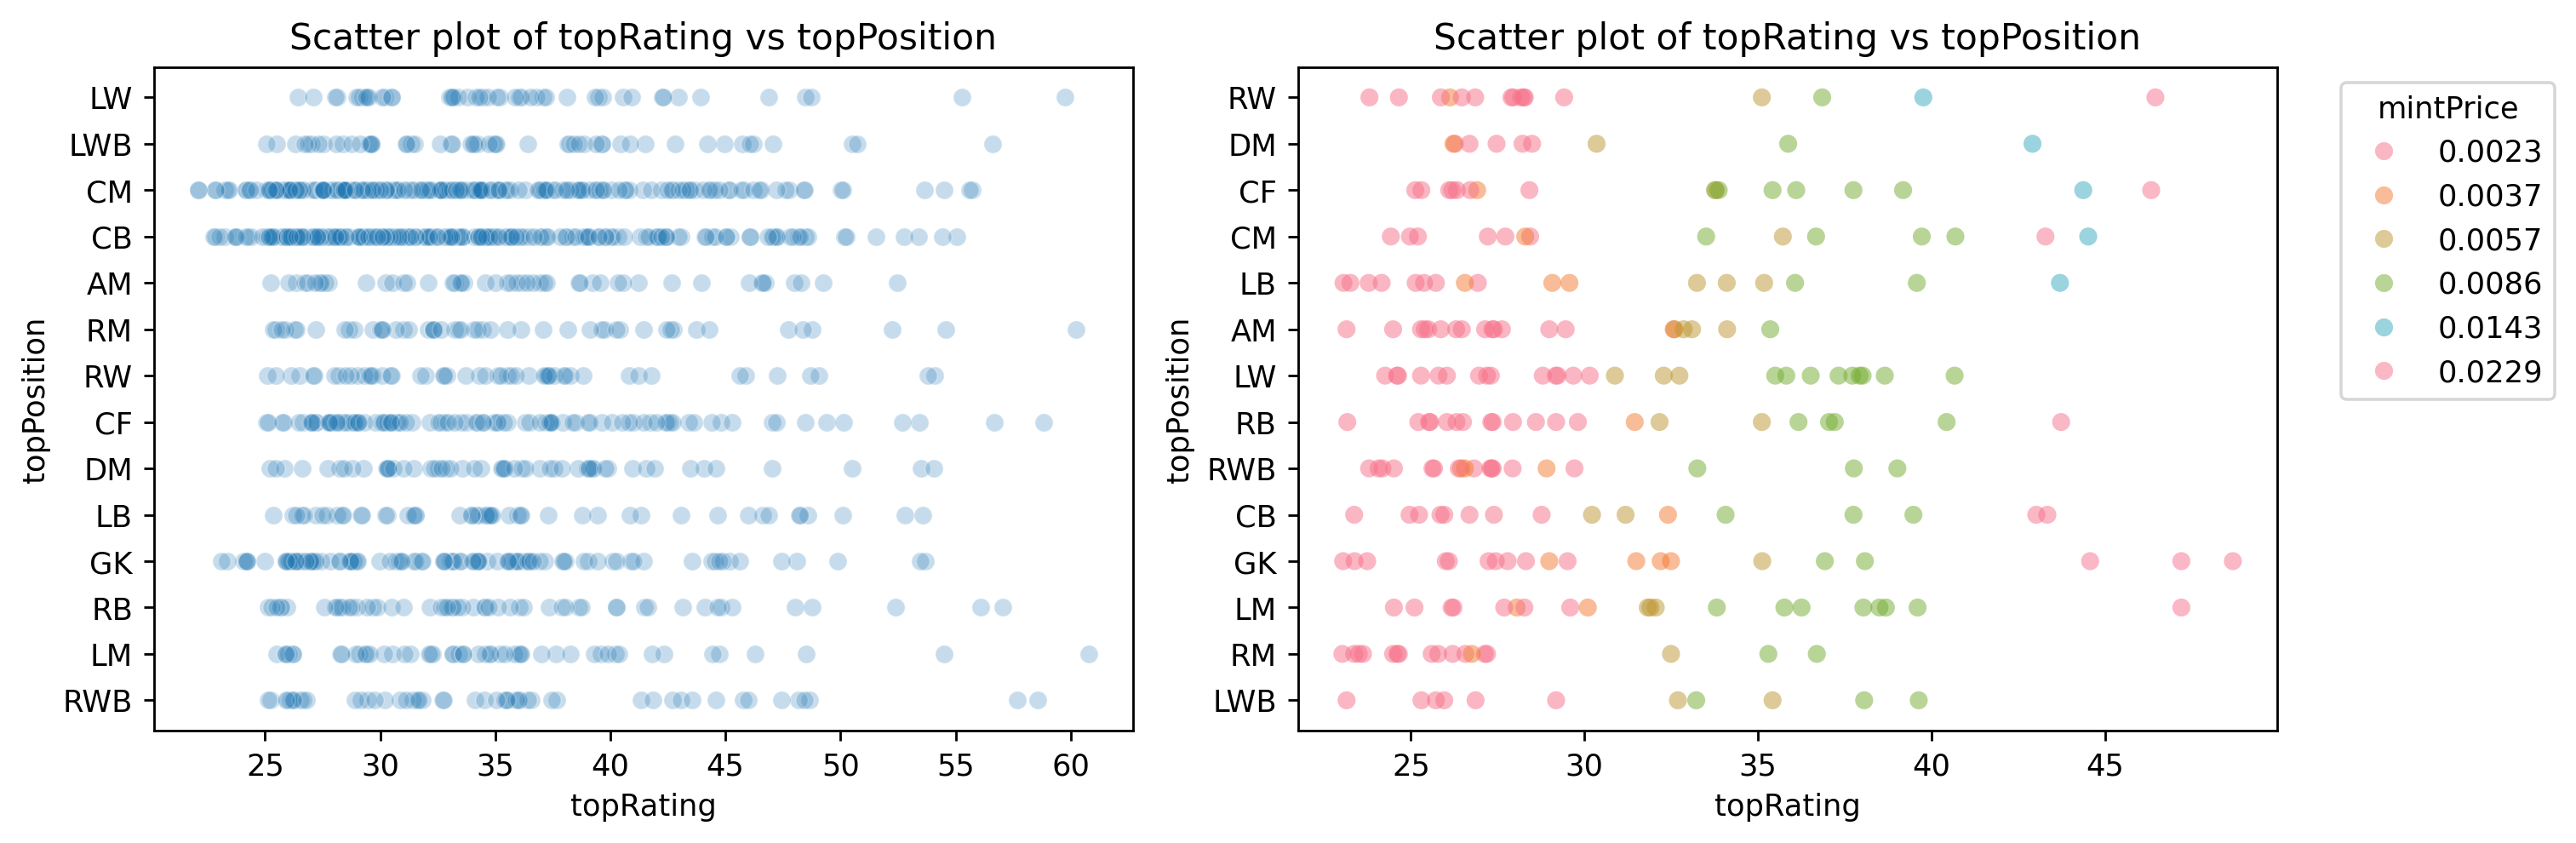

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for `players`
sns.scatterplot(x='topRating', y='topPosition', data=players, ax=axs[0], alpha=0.25)
axs[0].set_title('Scatter plot of topRating vs topPosition')
axs[0].set_xlabel('topRating')
axs[0].set_ylabel('topPosition')

# Scatter plot for `academy_players` with different colors for each 'mintPrice'
sns.scatterplot(x='topRating', y='topPosition', hue='mintPrice', palette='husl', edgecolor='none', data=academy_players, ax=axs[1], alpha=0.5)
axs[1].set_title('Scatter plot of topRating vs topPosition')
axs[1].set_xlabel('topRating')
axs[1].set_ylabel('topPosition')
axs[1].legend(title='mintPrice', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right

plt.tight_layout()  # Adjust the layout
plt.show()